### ChurnSage: (95% F1-score & Accuracy)
* Upside of this model is that it doesn't require heavy computational power and time of GPU deep learning.<br>

Optimally engineered machine learning model that predicts which customers are most likely to churn; based on <br>
(1) Geographic Information <br>
(2) Customer Account Information & Demographic <br>
(3) Services Information

# Data Exploration and Cleaning:
* Performed exploratory data analysis to understand the dataset.

* Cleaned the data by handling missing values, incorrect datatype, and irrelevant columns.

In [ ]:
# data sceience imports :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick
%matplotlib inline

import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

# ML algorithm imports:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_excel("Telco_customer_churn.xlsx")
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [ ]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [ ]:
for column in df.columns:
    print(f'{column} - Unique Values: {df[column].unique()}')

CustomerID - Unique Values: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Count - Unique Values: [1]
Country - Unique Values: ['United States']
State - Unique Values: ['California']
City - Unique Values: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Zip Code - Unique Values: [90003 90005 90006 ... 96128 96134 96146]
Lat Long - Unique Values: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Latitude - Unique Values: [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Longitude - Unique Values: [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Gender - Unique Values: ['Male' 'Female']
Senior Citizen - Unique Values: ['No' 'Yes']
Partner - Unique Values: ['No' 'Yes']
Dependents - Unique Values: ['No' 'Yes']
Tenure Months - Unique Values: [ 2  8 28 49 10  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

* Cleaning data type mismatch:

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

* Missing data analysis:

In [ ]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [ ]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


Almost all of them have the same `contract` type - 'Two year', and one customer has 'One Year' contract.<br>
We can use this valid trend. It's better not to delete samples when there's only single misssing value.

We find median of `Total charges` only when `contract type` = 'Two year'
Replace missing value with median based on `contract type` trend.

##### Cleaning Missing values:

In [ ]:
two_yr_contract_df = df[df['Contract'] == 'Two year']
trend_median = two_yr_contract_df['Total Charges'].median()
df['Total Charges'] = df['Total Charges'].fillna(trend_median)

In [ ]:
def drop_features(columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True)

columns_to_drop=['CustomerID','Count','Country','State','Lat Long', 'Churn Reason', 'Zip Code', 'City'] #'Latitude','Longitude'
drop_features(columns_to_drop)
#df.head()

Some irrelevant columns for the time being:

* Lat Long: we will use seoarate Latitude, Longitude.

* State: dropped because only 1 state. doesn't generalize over all of usa<br>
All of the clients are from the United States of America, California. Not useful for Machine learning<br>

* City: Later, in bonus section we will do geographical and city analysis later

* Churn_Reason: Deleting the 'Churn_Reason' because only it is nowhere useful in model training, the reasons will come up for those people who moved and that too in post churn query not before they leave, also some other useless columns will be deleted

* Churn_Label: 'Churn_Label' has binary encoded 'Churn_Value' column

# Feature Engineering and Selection:

* Created and transformed relevant features that could help in predicting customer churn.

* With Explalanation of choices of features and all the transformations applied.

### Numerical feature selection :
 Analysis:

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

numerical_features =  numerical_df.columns.to_list()
items_to_remove = ['Churn Value', 'Latitude', 'Longitude']
for item in items_to_remove:
    numerical_features.remove(item)

numerical_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,33.964131,-118.272783,2,53.85,108.15,1,86,3239
1,34.059281,-118.307420,2,70.70,151.65,1,67,2701
2,34.048013,-118.293953,8,99.65,820.50,1,86,5372
3,34.062125,-118.315709,28,104.80,3046.05,1,84,5003
4,34.039224,-118.266293,49,103.70,5036.30,1,89,5340
...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,72,21.15,1419.40,0,45,5306
7039,34.667815,-117.536183,24,84.80,1990.50,0,59,2140
7040,34.559882,-115.637164,72,103.20,7362.90,0,71,5560
7041,34.167800,-116.864330,11,29.60,346.45,0,59,2793


* Feature selection to reduce dimensions complexity by Pearson's correlation map:

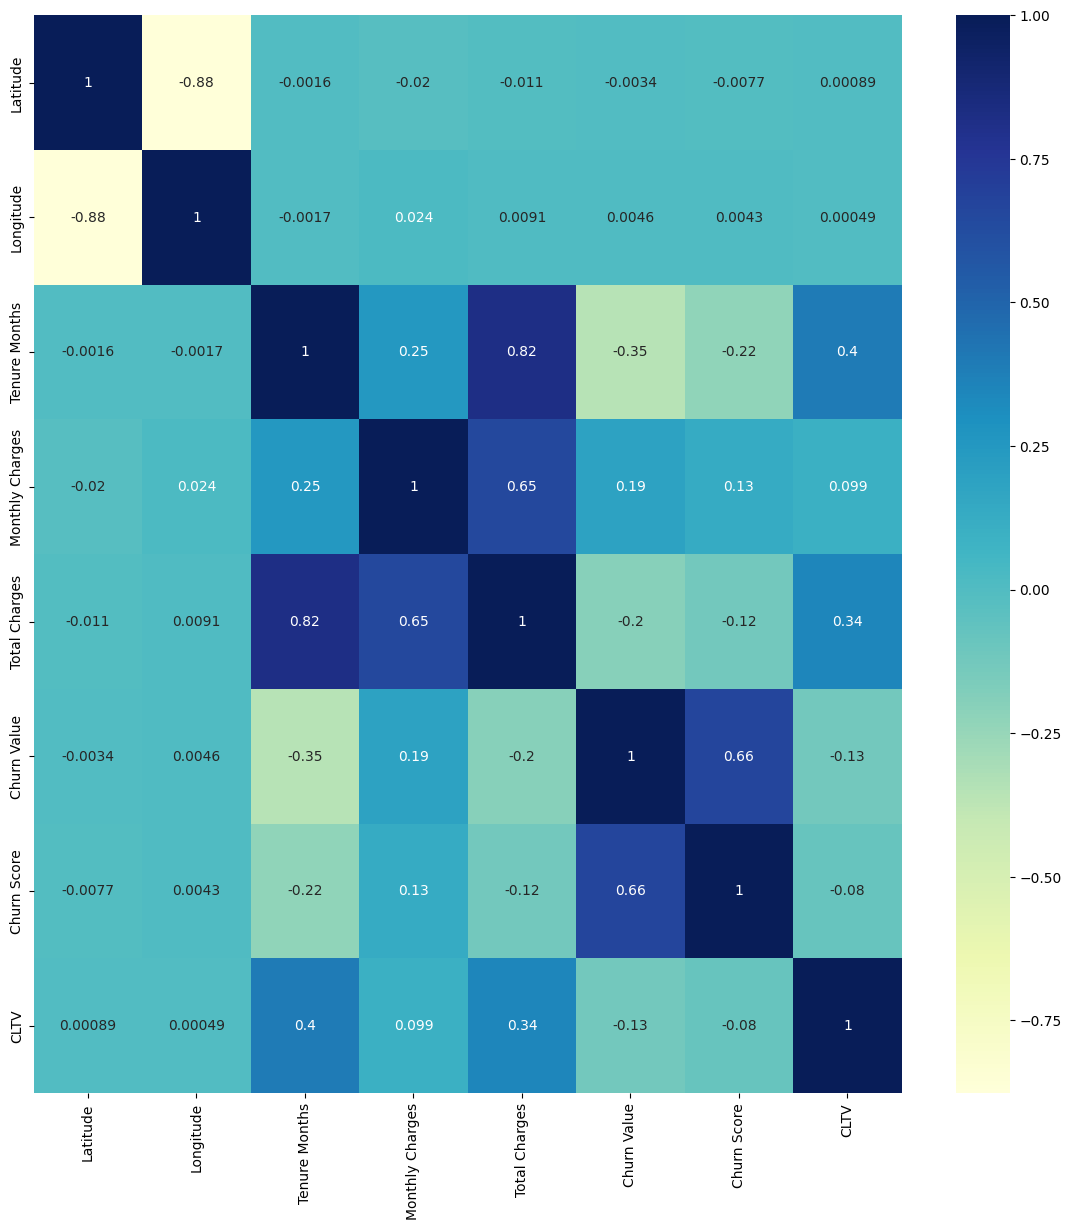

In [ ]:
def correlation_map(df):
    plt.figure(figsize=(14,14))
    sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
    plt.show()

correlation_map(numerical_df)

In [ ]:
def Correlated_features( df,threshold):
    '''return the features that have a high correlation with at least one other feature.'''
    drop_corr_feat=[]
    corr_mat=df.corr()
    for i in range(corr_mat.shape[1]):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                # print threshold condition match. Remove either of the matched column (i or j). append the choice in drop_corr_feat
                print(corr_mat.columns[i], ',', corr_mat.columns[j],':' , corr_mat.iloc[i,j])
                drop_corr_feat.append(corr_mat.columns[i])
    return drop_corr_feat

drop_corr_feat = Correlated_features(numerical_df,0.9)
drop_corr_feat


[]

Empty list. No Need to Drop Any Features for threshold value of 0.9

As the highest correlation coefficient is 0.9, No Need to drop any numerical feature.

### Histogram outlier analysis:

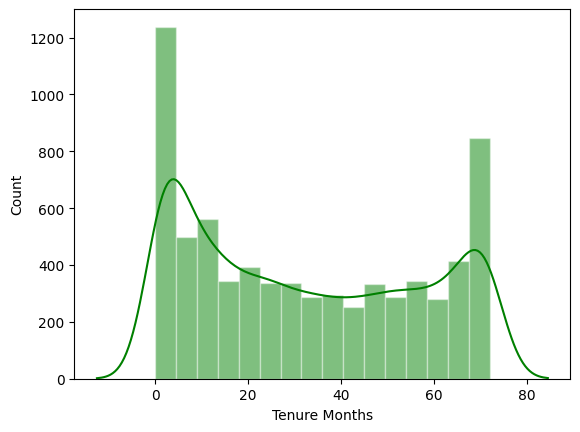

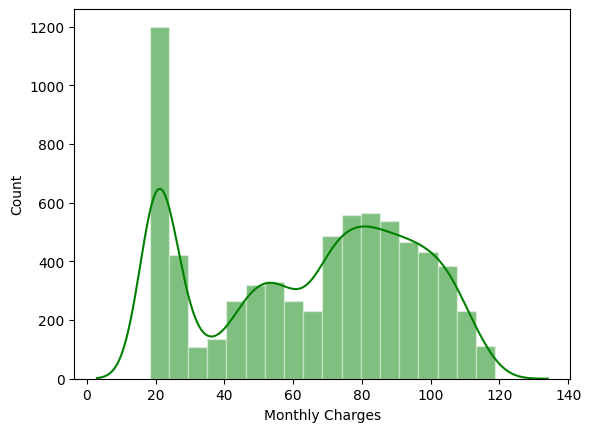

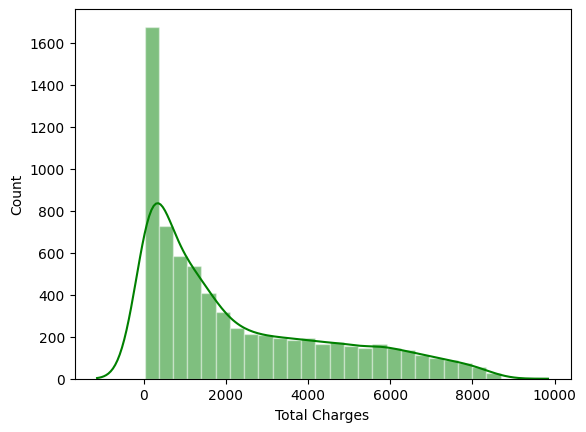

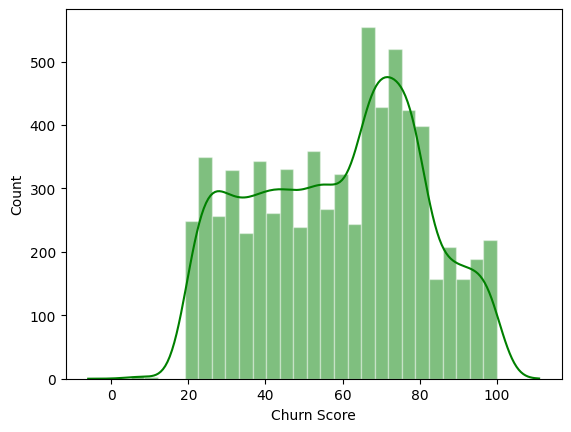

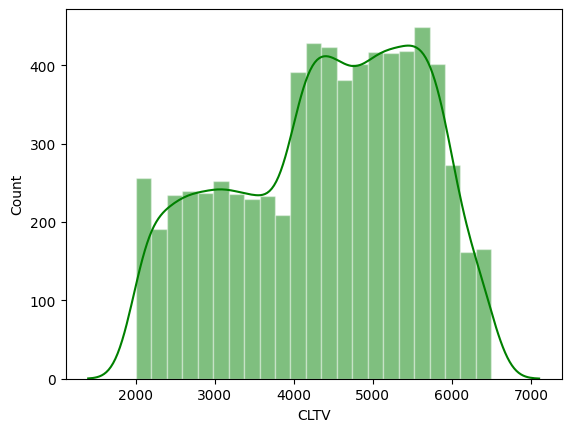

In [ ]:
def histogram_plot( df,numerical_features):
    for feature in numerical_features:
        sns.histplot(df[feature], kde=True,alpha=0.5,edgecolor=(1, 1, 1, .4), kde_kws=dict(cut=3), color='green')
        plt.show()

histogram_plot( numerical_df, numerical_features)



The features mostly have normal distribution bell curve. <br>
we can apply standard deviation to clean outliers. Then replace outliers with median to keep the data.
* statistical standard deviation to clean outliers : <br>


In [ ]:
def outlier_correction(df, numerical_features):
    for feature in numerical_features:
        upper_limit = df[feature].mean() + 2*df[feature].std()
        lower_limit = df[feature].mean() - 2*df[feature].std()
        df.loc[(df[feature] > upper_limit) | (df[feature] < lower_limit), feature] = df[feature].median()
    return df

df = outlier_correction(df, numerical_features)

In [ ]:
# histogram_plot( df, numerical_features)

### Scaling. Normalization:
In machine learning, some feature min-max range differ from other features multiple times.

Data Normalization is a common practice which consists of transforming numeric columns to a common scale.

In [ ]:
scaler = MinMaxScaler()

scaled_df = pd.DataFrame( scaler.fit_transform( df[numerical_features]),columns=numerical_features)

for feature in numerical_features:
    df[feature] = scaled_df[feature]

with open('numerical_feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### categorical feature selection:
* Using statistical visualization to select features:

In [ ]:
categorical_df = df.select_dtypes(exclude=[np.number])

categorical_df.drop(columns=['Churn Label'], inplace = True)
categorical_features = categorical_df.columns.to_list()
categorical_features

h:\dokkho project ongoing\prj-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


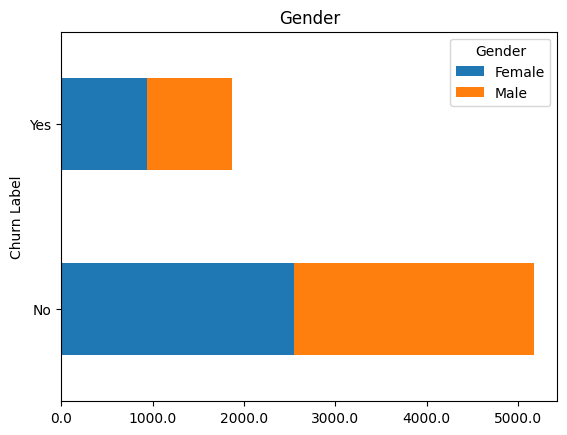

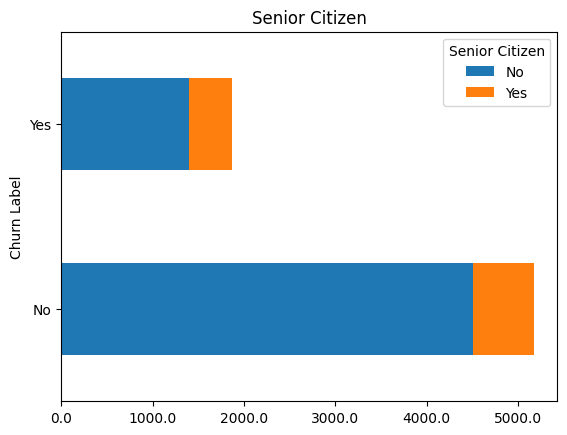

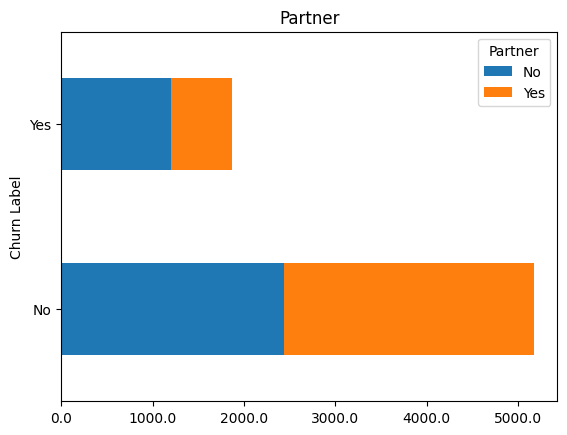

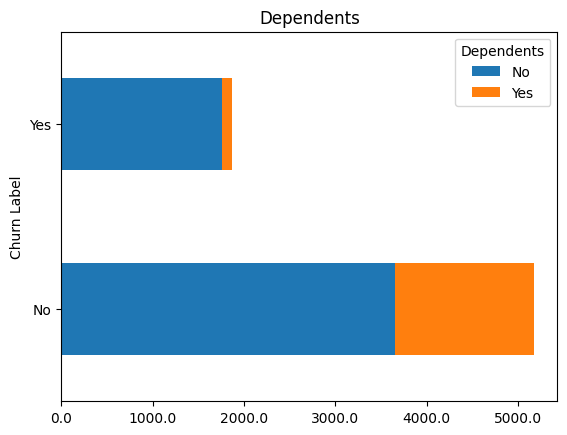

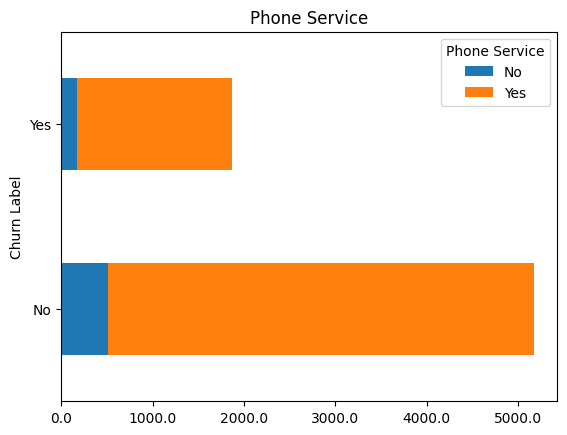

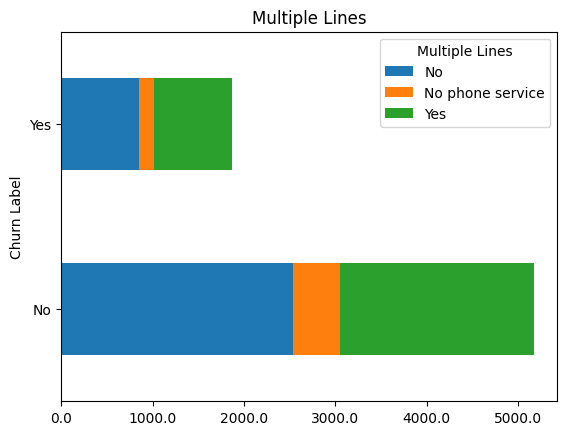

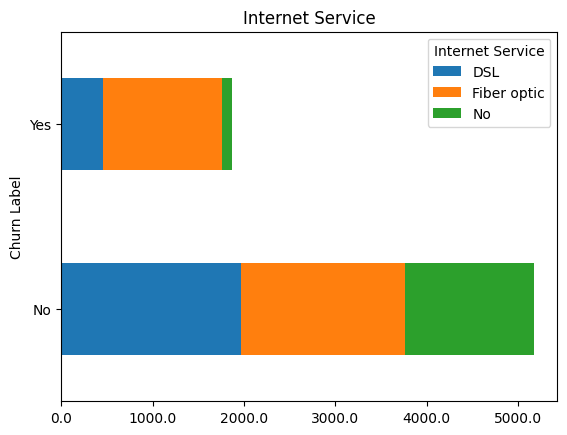

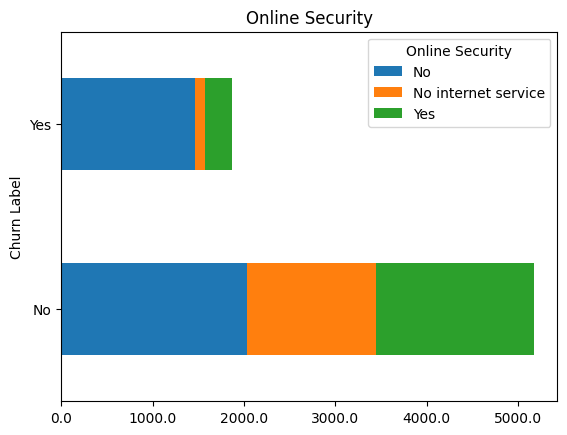

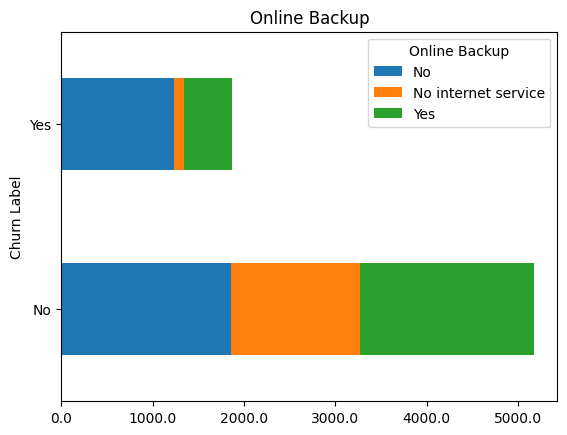

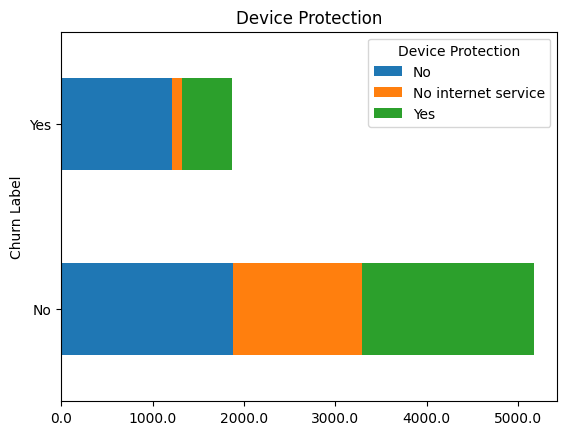

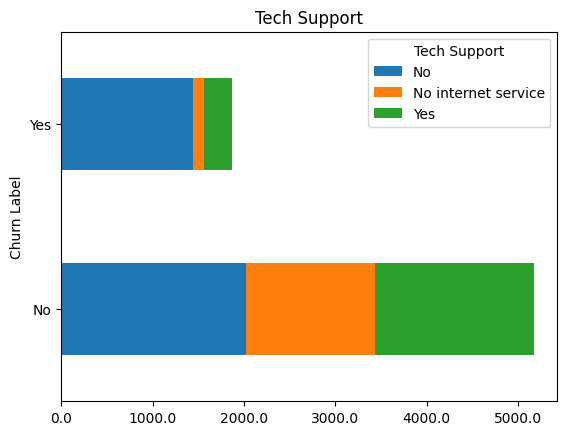

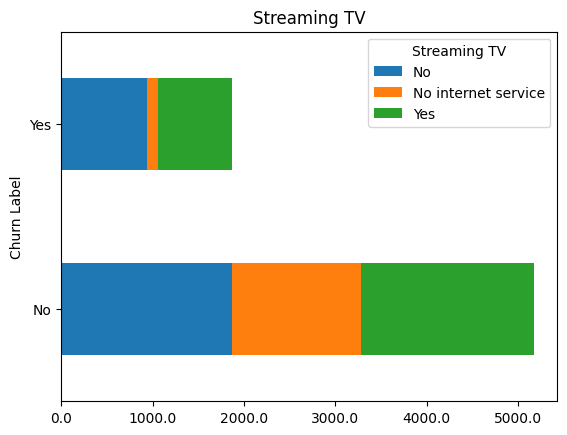

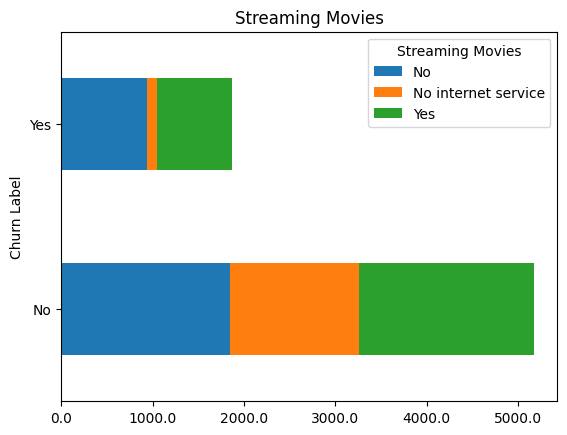

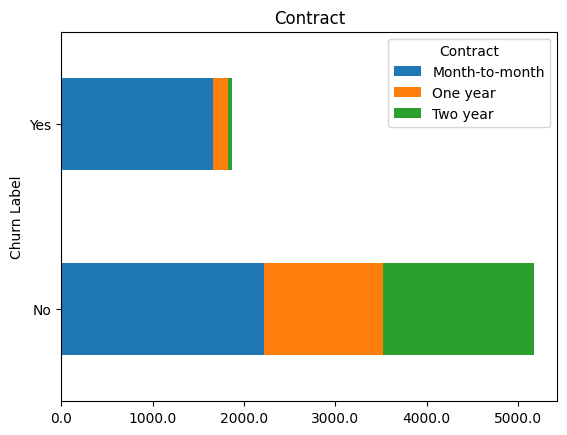

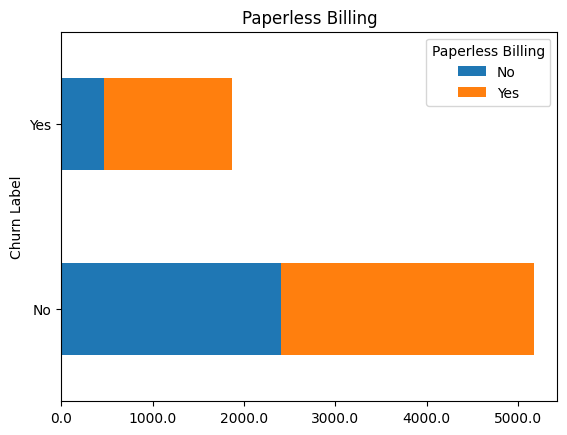

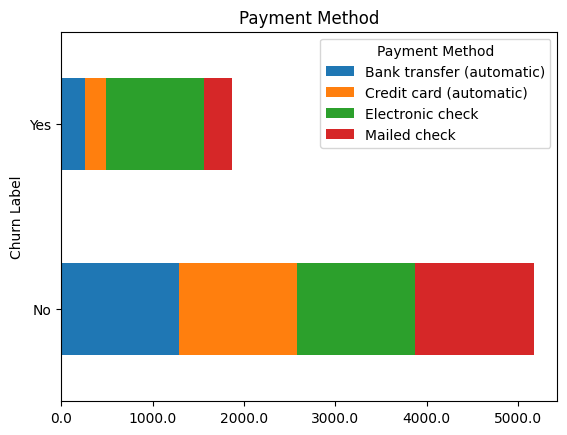

In [ ]:
def correlation_barchart(feature_list):
    ''' find churn's correlation with discrete/categorical features '''
    for feature in feature_list:
        chart = pd.crosstab(df["Churn Label"], df[feature]).plot(kind="barh", stacked=True)
        chart.set_title(feature)
        chart.set_xticklabels(chart.get_xticks())
        chart.set_xlabel('')

correlation_barchart(categorical_features)

* Features that correlates to churn. Must required prominent Features:<br>
Partner',
'Dependents',
'Internet Service',
'Online Security',
'Online Backup',
'Device Protection',
'Tech Support',
'Streaming TV',
'Streaming Movies',
'Contract',
'Paperless Billing',
'Payment Method

* Relatively less impacting Features:
'Gender',
'Senior Citizen',
'Phone Service',
'Multiple Lines'


#### One Hot Encoding on categorical features (into numeric):

In [ ]:
df = pd.get_dummies( df, prefix=categorical_features, columns=categorical_features)
df

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,0.027778,0.354229,0.013151,Yes,1,0.8250,0.269653,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,34.059281,-118.307420,0.027778,0.521891,0.019554,Yes,1,0.5875,0.149160,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,34.048013,-118.293953,0.111111,0.809950,0.117999,Yes,1,0.8250,0.747368,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,34.062125,-118.315709,0.388889,0.861194,0.445567,Yes,1,0.8000,0.664726,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,34.039224,-118.266293,0.680556,0.850249,0.738503,Yes,1,0.8625,0.740202,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,1.000000,0.028856,0.206148,No,0,0.3125,0.732587,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0
7039,34.667815,-117.536183,0.333333,0.662189,0.290206,No,0,0.4875,0.023516,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7040,34.559882,-115.637164,1.000000,0.845274,0.203373,No,0,0.6375,0.789474,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7041,34.167800,-116.864330,0.152778,0.112935,0.048225,No,0,0.4875,0.169765,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


### Dataset preparation:

In [ ]:
# use 'Churn Value' to predict churn
df.drop(columns=['Churn Label'], inplace = True)

##### Handle target class imbalace with SMOTE: <br>
* We see that our data is unbalanced. Lower churn data. Unbalanced data is not good for this binary classification

In [ ]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

The churn yes data is very low which is crucial. Use SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is algorithm for oversampling the minority class in an imbalanced datase.t

* SMOTE:

In [ ]:
smote = SMOTE(sampling_strategy = 1)

# input data X, prediction target variable y
X = df.drop("Churn Value", axis = 1)
y = df['Churn Value']
X,y = smote.fit_resample(X,y)

In [ ]:
y.value_counts()

1    5174
0    5174
Name: Churn Value, dtype: int64

In [ ]:
# Save the specific dataset in csv format. it will be employed to train this model
final_df = pd.concat([X, y], axis=1)
final_df.to_csv('preprocessed_dataset.csv', index=False)

In [ ]:
df = pd.read_csv('preprocessed_churnSage_dataset.csv')
df.head()

* dataset spilt: <br>
applied stratify for balanced distribution in train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y ,random_state=20, shuffle=True, stratify=y, test_size=0.25)

All Data preprocessing complete for machine learning prediction.

# Model Building and Validation:

* Used a baseline model to monitor dataset baseline complexity.

* Monitored dataset baseline complexity

* Benchmark_models such as logistic regression, SVM, KNN or random forests.

In [ ]:
# benchmark models:
def create_models(seed=42):
    '''
    Create a list of machine learning models to benchmark.
        Parameters:
                seed (integer): random seed of the models
        Returns:
                models (list): list containing the models
    '''

    models = []

    # weakest model. To monitor dataset baseline complexity:
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    # Algorithms:
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models


models = create_models()

In [ ]:
# test the accuracy of each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # train the model
    model.fit(X_train, y_train).predict(X_test)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    results.append(accuracy)
    names.append(name)

    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.4998067259373792)


Classifier: k_nearest_neighbors, Accuracy: 0.847313490529571)
Classifier: logistic_regression, Accuracy: 0.9443370699652107)


h:\dokkho project ongoing\prj-env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier: support_vector_machines, Accuracy: 0.7634325473521454)
Classifier: random_forest, Accuracy: 0.9485890993428682)
Classifier: gradient_boosting, Accuracy: 0.93931194433707)


Classifier: dummy_classifier, Accuracy: 0.4998067259373792)

Classifier: k_nearest_neighbors, Accuracy: 0.8391959798994975)

Classifier: logistic_regression, Accuracy: 0.9311944337069965)

Classifier: support_vector_machines, Accuracy: 0.761886354851179)

Classifier: random_forest, Accuracy: 0.9505218399690761)

Classifier: gradient_boosting, Accuracy: 0.9381522999613452)

### Selected algorithm: Randrom Forest (with 95% baseline accuracy).

## hyperparameters Tuning and 5-fold cross-validation:

In [ ]:
# define the parameter grid
grid_parameters = {'n_estimators': [15,20,30,40,50], # bing commonn 3 to 30
                   'max_depth': [20,30,35,40],   #bing low 5-8
                   'max_features': [None, 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 5, 6]  #bing common [2, 5, 6, 10]
}

# set RandomizedSearchCV evaluating different parameter combinations with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=100,
                                   n_jobs=1)

# evaluating parameter combinations. hyperparameters Tuning
random_search.fit(X_train, y_train)

#  best parameters after tuning:
print(random_search.best_params_)

{'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 35}


In [ ]:
#save model
version = 2
filename = f'churnSage_model_v{version}_tuned.pkl'
pickle.dump(random_search, open(filename, 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
filename = 'churnSage_model_v2_tuned.pkl'
model = pickle.load(open(filename, 'rb'))
# print(model.best_params_)

{'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 35}


# Model Evaluation using metrics:
* Evaluation of the model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC:

In [ ]:
predictions = model.predict(X_test)

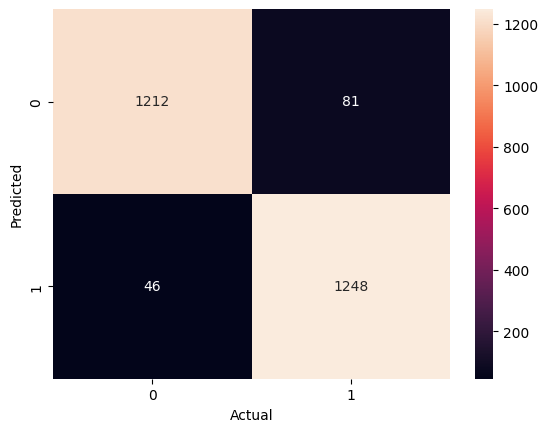

In [ ]:
# construct the confusion matrix
cf = confusion_matrix(y_test, predictions)
# print(cf) #raw data

# visualize the confusion matrix
sns.heatmap(confusion_matrix( y_test, predictions), annot=True,fmt='d')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

* We can see false negatives are much less. Only 81 compared to 1248.

* Minimal false negatives (i.e., correctly identifying all customers who are likely to churn) is very important for churn predicton.

* This is optimnal performance.

This is supported below:

In [ ]:
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1293
           1       0.94      0.96      0.95      1294

    accuracy                           0.95      2587
   macro avg       0.95      0.95      0.95      2587
weighted avg       0.95      0.95      0.95      2587



Prediction task is focused on if user will churn/leave. <br> so, minimizing false negatives(correctly identifying who will churn) is important. F1-score is a good indicator metric for this.

AUC score is : 0.950903151077434


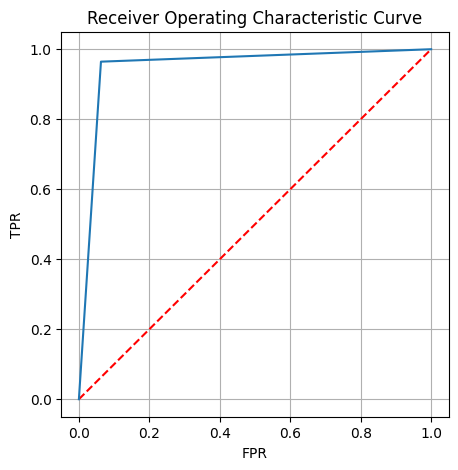

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,predictions)
print("AUC score is : {}".format(auc(fpr,tpr)))

#Plotting the ROC
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.title("Receiver Operating Characteristic Curve")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.grid()
plt.show()

## Insights and Conclusive Remarks: <br>

Interpretation of results and insights on the model's performance: <br>

Prediction task is focused on if user will churn/leave. <br>
so, minimizing false negatives(correctly identifying who will churn) is important. F1-score is a good indicator metric for this.<br>

minimizing false negatives (i.e., correctly identifying all customers who are likely to churn) may be more important than minimizing false positives. So, it could be more useful to look at F1 score than accuracy, for example.

An F1 score of 95% is a good score for a binary classification model.

### we will create a `Deployment plan` for deploying the churn prediction model in real world. but before that, we will complete the `BONUS analysis Tasks`:

P.s. after `BONUS analysis Tasks` don't forget to check `Deployment plan` section:

# BONUS analysis Tasks:
This analysis result will have easy to understand visualized insights even for non technical people and stakeholders:

In [ ]:
data = pd.read_excel("Telco_customer_churn.xlsx")
pd.set_option('display.max_columns', None)
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Geographic Analysis of Churn:
* We will identify regions with the highest `churn value` rates
* We will also check churn patterns `geographically`.
* We will `suggest possible reasons for higher churn rates in certain areas.` <br>
All using Use 'Country', 'State', 'City', 'Zip Code', 'Lat Long'.

In [ ]:
data['City'].nunique()

1129

There are 1129 unique californita cities in total in the dataset, so, let's check where our customers located and if geography of customer has impact to the churn rate

In [ ]:
fig = px.bar(data.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False).head(50),
             x='City',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

* largest number of customers in the Los Angeles, San Diego, San Francisco area. We can see this geographically with 'Latitude','Longitude' :

In [ ]:
fig = px.scatter_mapbox(data.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index(), lat="Latitude", lon="Longitude", hover_data= ['CustomerID'], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Reason and patterns: Logically, Los Angeles, San Diego, San Francisco are large cities. So, it makes sense more users are will be more interested in such citites.

## Demographic Analysis of churn:
* Utilized 'Gender', 'Senior Citizen', 'Partner', and 'Dependents' to analyze demographic patterns in churn.

* Investigate if certain demographic `groups are more prone` to churn and `hypothesize` why.

Analysis using different factors like age, gender, and family status

In [ ]:
def feature_churn_chart(feature_name:str):
        chart = pd.crosstab(data["Churn Label"], data[feature_name]).plot(kind="barh", stacked=True)
        chart.set_title(feature_name)
        chart.set_xticklabels(chart.get_xticks())
        chart.set_xlabel('Count')

        # Scaling data to their percentage with normalize:
        normalized_chart = pd.crosstab(data["Churn Label"], data[feature_name], normalize='index')
        # Multiply by 100 to get percentages and plot
        chart = (normalized_chart*100).plot(kind="barh", stacked=True)
        chart.set_title(feature_name+' Percentage Scale')
        chart.set_xticklabels(chart.get_xticks())
        chart.set_xlabel('Percentage')

##### Gender:

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



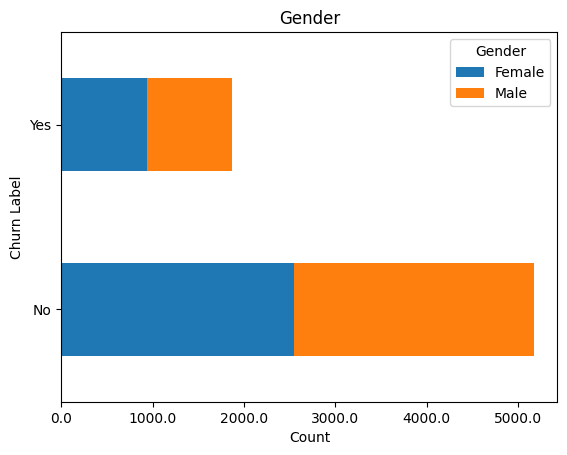

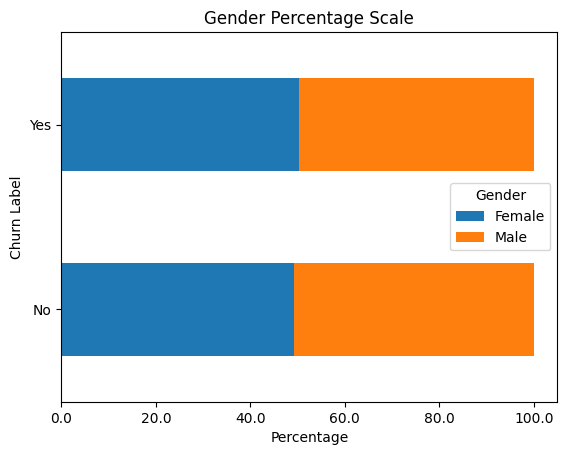

In [ ]:
feature_churn_chart('Gender')

* We have an almost equal number of men and women in the data set.

* Both gender have similar churn rate. We see there is no difference in the churn rate.

##### Age:

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 0, 'Count')

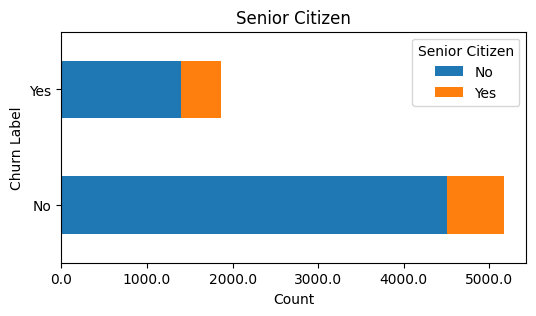

In [ ]:
chart = pd.crosstab(data["Churn Label"], data['Senior Citizen']).plot(kind="barh", stacked=True, figsize=(6,3))
chart.set_title('Senior Citizen')
chart.set_xticklabels(chart.get_xticks())
chart.set_xlabel('Count')

*  there are much fewer such `senior citizens` customers

* `non-senior citizens` are majority of customers which makes sense

now important analysis:

In [ ]:
fig = px.pie(data.groupby(['Senior Citizen','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Churn Label',
            facet_col = 'Senior Citizen',
            color = 'Churn Label',
            title = 'Churn rate by customer age')

fig.show()

* `senior citizens (orange)` are almost twice as high to churn. `41% churn`. 23% churn no.

##### Family 'Partner', and 'Dependents' :

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



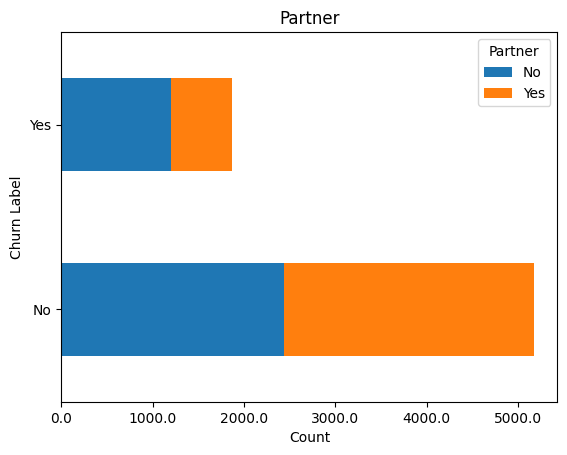

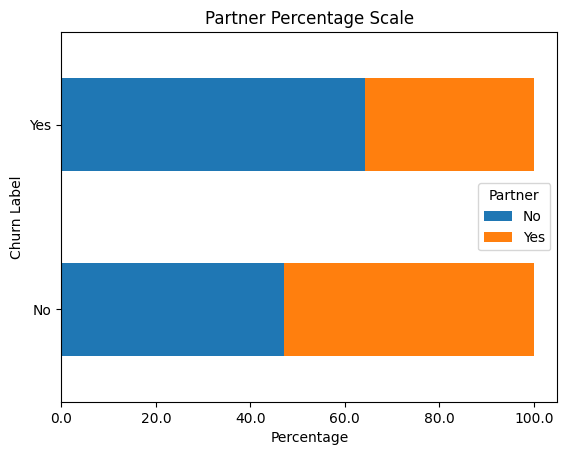

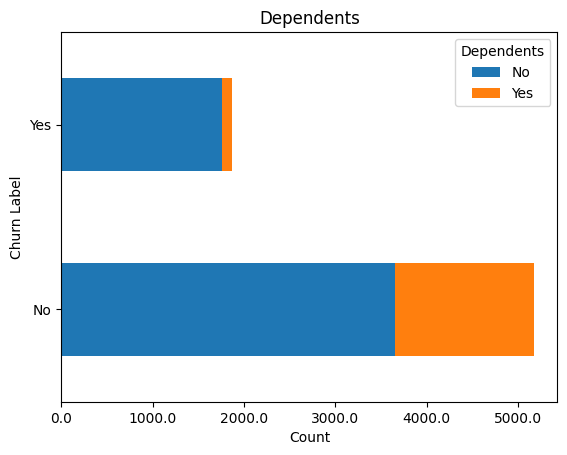

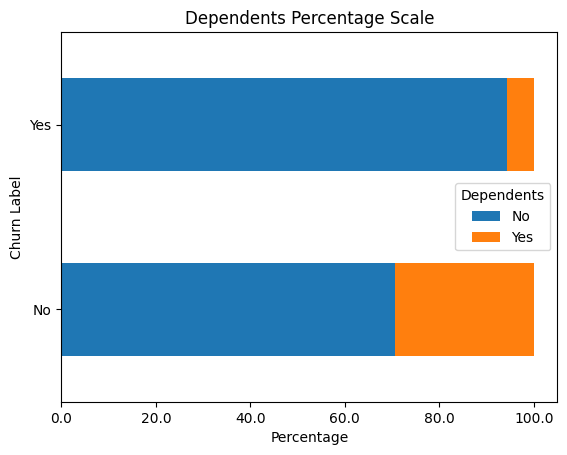

In [ ]:
feature_churn_chart('Partner')
feature_churn_chart('Dependents')

* customers with `no partner` are bit more likely to churn. 65% churn rate but major 45% don't churn.

* customers with `dependants` substantially less prone to churn. 30% don't churn. only around 5% churn.

* overall number of customers with `dependants` lower than customers with `no dependants`.

* customers with `no dependants` are bit more likely to churn. 95% churn rate but major 70% don't churn. Most customers have `dependants` which makes sense.

##  Service Utilization Analysis:

Following is the Analysis of services such as 'Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', and 'Streaming Movies'
* Determined which service combinations are more associated with higher churn:

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

h:\dokkho project ongoing\prj-env\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



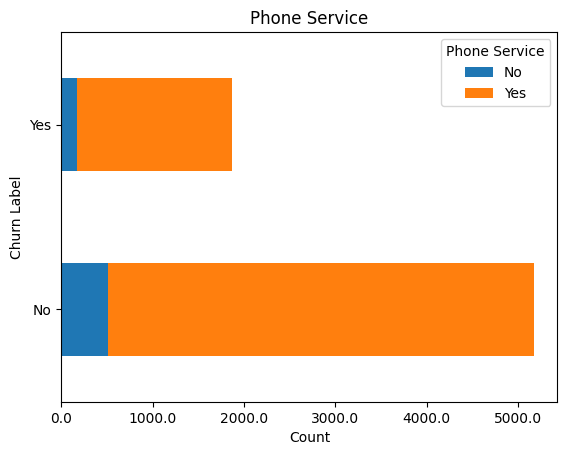

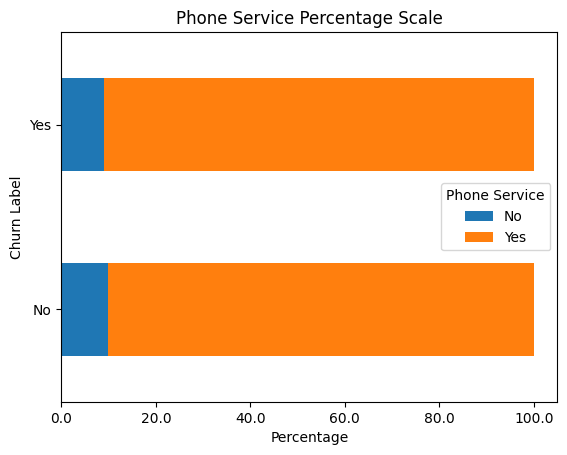

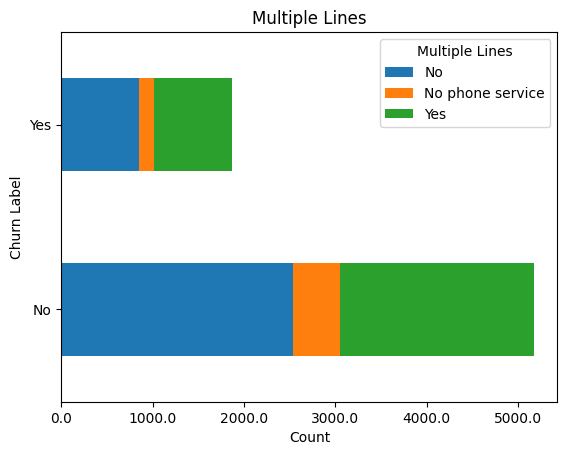

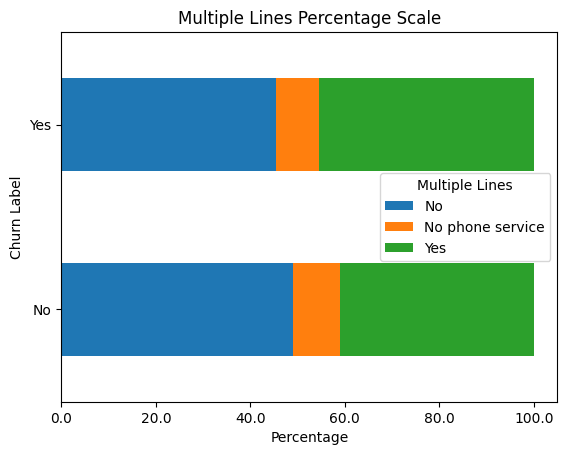

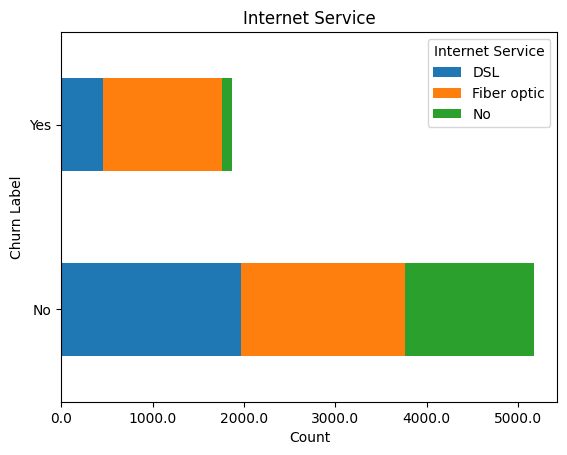

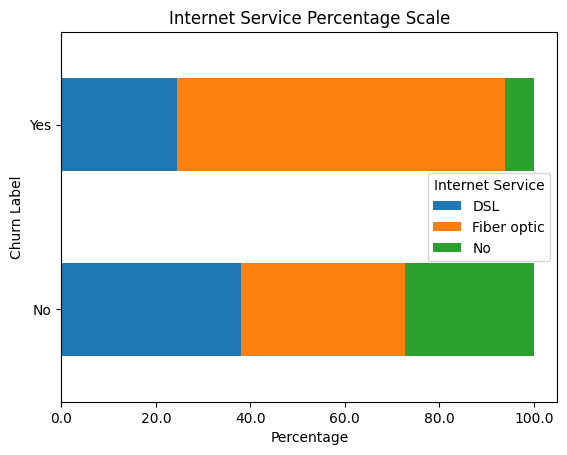

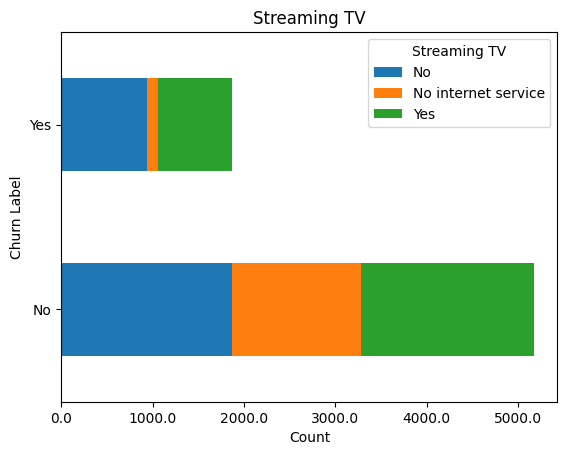

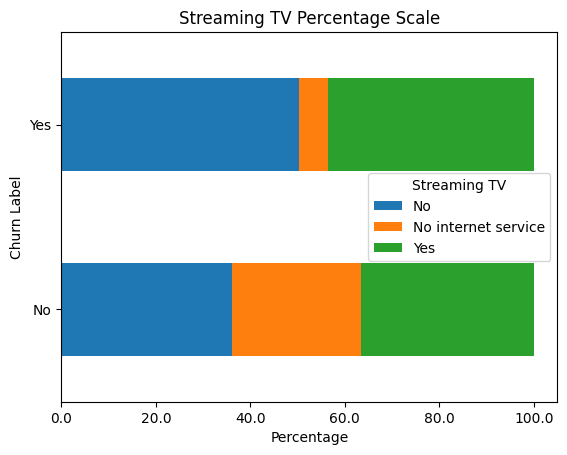

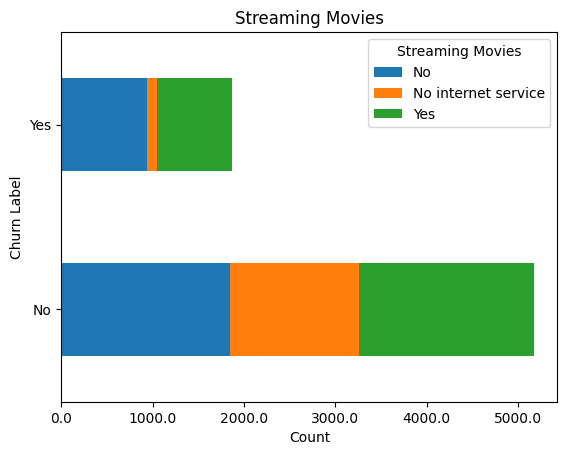

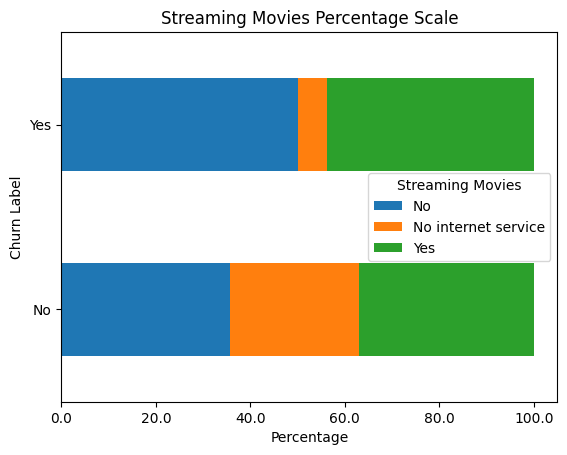

In [ ]:
services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies']

for service in services:
    feature_churn_chart(service)

* Observing the `churn rate`, having `phone service` doesn’t contribute to churn.

* Having `multiple lines` doesn’t contribute to churn.

* The combination of `fiber optics internet service` is `highly prone` to churn. Improvements should be made or alternatives like DSL should be provided.

* The `DSL internet service` combination has a much `lower` rate of churn. The company can focus on DSL internet service.

* Customers who have `no internet service` when it comes to `streaming TV `or `streaming movies` are less likely to churn.


finally,

# Deployment Plan:

● Outline of the steps for deploying the model into a production environment.

● A detailed explanation how the model will be monitored and maintained over time.

Here's comprehensive version of my knowledge on the subject matter :

##### Outline steps for deploying:

`Model Serialization`: The finalized model needs to be serialized for deployment. This can be achieved using techniques like pickling in Python or JSON encoding. Additionally, the server might require specific Python libraries, which can be installed using requirements.txt.

`Deployment Approach`: The model can be integrated into an existing backend system or a new application can be built from scratch using lightweight frameworks like Flask, which is particularly suited for deploying models. As a REST API using frameworks like FastAPI. Django can also be used depending on the requirements. For maintaining and updating the model, it’s essential to connect it to a version control system like Git.

`Hosting Options`: The model can be hosted for free on platforms like Hugging Face Spaces, which even supports Python apps. The model can be accessed via API in a web service from these platforms. Alternatively, cloud platforms like AWS or Azure ML can also be used for hosting the model.


##### monitoring and maintainance:

`Performance Monitoring`: The performance of the model needs to be continuously monitored. This can be done by tracking metrics like accuracy, precision, recall, and F1 score for classification models. Any significant drop in performance should trigger a review.

`Data Drift`: Over time, the distribution of the data the model is making predictions on may change. This is known as data drift. Monitoring for data drift can help detect when the model might need to be retrained.

`Retraining`: If the model’s performance drops, or if there is significant data drift, the model may need to be retrained. This involves going back to the original training data, possibly collecting more recent data, and re-running the training and validation process.

`Versioning`: Whenever the model is retrained, the new version of the model should be deployed alongside the old one. This allows for A/B testing to compare the performance of the new model against the old one. (lmao this 3 are data drift)